# Cruce Peatonal Fuzzy

In [2]:
#!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

### Generacion de variables

In [34]:
# Generar variables
#   trafico (vehiculos/min)
#   cantidad de personas en el cruce

#0 a 1000 vehiculos / min
x_trafico = np.arange(0, 1001, 1)
#0 a 30 personas
x_personas = np.arange(0, 31, 1)
#0 a 120 segundos
x_tiempo = np.arange(0, 121, 1)

#Generar funciones de pertenencia
trafico_lo = fuzz.gaussmf(x_trafico, 0, 200)
trafico_md = fuzz.gaussmf(x_trafico, 500, 150)
trafico_hi = fuzz.gaussmf(x_trafico, 1000, 200)

personas_lo = fuzz.gaussmf(x_personas, 0, 6)
personas_md = fuzz.gaussmf(x_personas, 15, 4)
personas_hi = fuzz.gaussmf(x_personas, 30, 6)

tiempo_lo = fuzz.trimf(x_tiempo, [0,0,60])
#tiempo_md = fuzz.trimf(x_tiempo, [0,60,120])
tiempo_md = fuzz.gaussmf(x_tiempo, 60, 10)
tiempo_hi = fuzz.trimf(x_tiempo, [60,120,120])



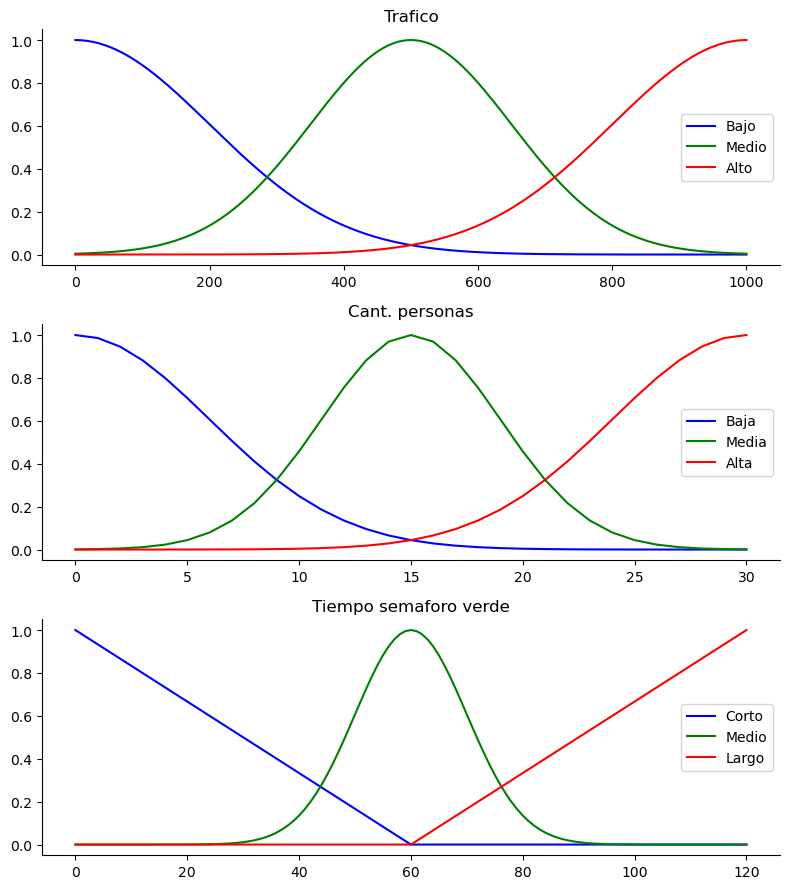

In [35]:
# Graficar funciones
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_trafico, trafico_lo, 'b', linewidth=1.5, label='Bajo')
ax0.plot(x_trafico, trafico_md, 'g', linewidth=1.5, label='Medio')
ax0.plot(x_trafico, trafico_hi, 'r', linewidth=1.5, label='Alto')
ax0.set_title('Trafico')
ax0.legend()

ax1.plot(x_personas, personas_lo, 'b', linewidth=1.5, label='Baja')
ax1.plot(x_personas, personas_md, 'g', linewidth=1.5, label='Media')
ax1.plot(x_personas, personas_hi, 'r', linewidth=1.5, label='Alta')
ax1.set_title('Cant. personas')
ax1.legend()

ax2.plot(x_tiempo, tiempo_lo, 'b', linewidth=1.5, label='Corto')
ax2.plot(x_tiempo, tiempo_md, 'g', linewidth=1.5, label='Medio')
ax2.plot(x_tiempo, tiempo_hi, 'r', linewidth=1.5, label='Largo')
ax2.set_title('Tiempo semaforo verde')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

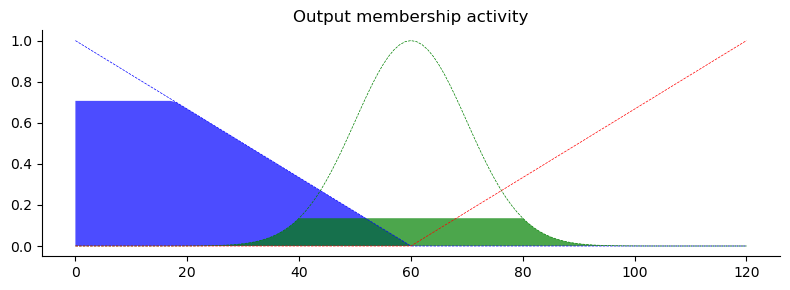

In [52]:
#Evaluar puntos
value_trafico = 200
value_personas = 25

trafico_level_lo = fuzz.interp_membership(x_trafico, trafico_lo, value_trafico)
trafico_level_md = fuzz.interp_membership(x_trafico, trafico_md, value_trafico)
trafico_level_hi = fuzz.interp_membership(x_trafico, trafico_hi, value_trafico)

personas_level_lo = fuzz.interp_membership(x_personas, personas_lo, value_personas)
personas_level_md = fuzz.interp_membership(x_personas, personas_md,value_personas)
personas_level_hi = fuzz.interp_membership(x_personas, personas_hi, value_personas)

#Regla 1: trafico alto OR cant. personas baja then -> tiempo largo
active_rule1 = np.fmax(trafico_level_hi, personas_level_lo)
tiempo_activation_hi = np.fmin(active_rule1, tiempo_hi)

#Regla 2: trafico medio AND cant. personas media then -> tiempo medio
active_rule2 = np.fmax(trafico_level_md, personas_level_md)
tiempo_activation_md = np.fmin(active_rule2, tiempo_md)

#Regla 3: trafico bajo OR cant. personas alta then -> tiempo corto
active_rule3 = np.fmax(trafico_level_lo, personas_level_hi)
tiempo_activation_lo = np.fmin(active_rule3, tiempo_lo)


tiempo0 = np.zeros_like(x_tiempo)

# Visualizar
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tiempo, tiempo0, tiempo_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tiempo, tiempo_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tiempo, tiempo0, tiempo_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tiempo, tiempo_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tiempo, tiempo0, tiempo_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tiempo, tiempo_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

tiempo semaforo verde: 27.339548180524464 seg


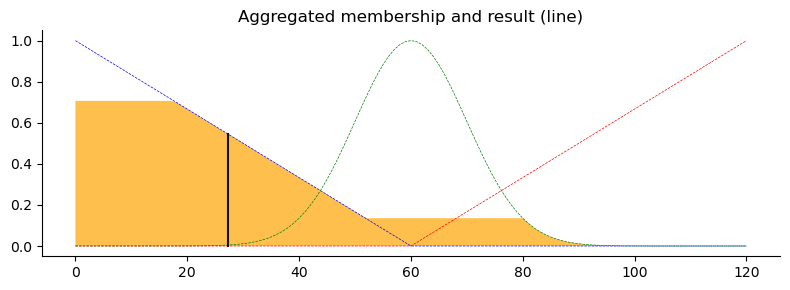

In [53]:
# Agregacion
aggregated = np.fmax(tiempo_activation_lo, np.fmax(tiempo_activation_md, tiempo_activation_hi))

# Calculate defuzzified result
tiempo = fuzz.defuzz(x_tiempo, aggregated, 'centroid')


# Armar grafico
tiempo_activation = fuzz.interp_membership(x_tiempo, aggregated, tiempo)
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tiempo, tiempo_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tiempo, tiempo_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tiempo, tiempo_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tiempo, tiempo0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tiempo, tiempo], [0, tiempo_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
print("tiempo semaforo verde: " + str(tiempo) + " seg")